In [1]:
import datetime as datetime
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 5)
import re
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation

## Loading DataFrames

In [2]:
udf = pd.read_pickle('Your/Data/Path/tweaked_user_dataframe.pkl')
udf

,location,id,name,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,country
0,"Waiyaki Way, Westlands",697374646614781952,AACC-CETA,False,1565,666,2795,Kenya
1,NaN,87371572,ACNA,False,9023,1796,3393,NaN
2,Anglican Communion Office,903497472,Anglican Alliance,False,2291,1195,3599,United Kingdom
3,Rome,761714520,Anglican Centre Rome,False,2681,839,1733,Italia
4,"Nairobi, Kenya",1020255964044328961,Anglican Church of Kenya,False,1095,185,567,Kenya
...,...,...,...,...,...,...,...,...
166,"Federal Way, WA",11859822,World Vision USA,True,554386,14283,92602,United States
164,"Plot 15B Nakasero, Kampala",759998299,World Vision Uganda,False,4278,580,3375,Uganda
167,"Dakar, Senegal",830807449,World Vision West Africa,False,2245,563,2088,Sénégal
157,"Addis Ababa, Ethiopia",2231308272,WorldVision Ethiopia,False,1958,178,420,ኢትዮጵያ


In [3]:
df = pd.read_pickle('Your/Data/Path/tweet_dataframe_p4.pkl')
df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


## Cleanup

In [4]:
# Functions
# --- Drop columns not needed for analysis from tweet DataFrame
def clean_tweet(df):
    return (df
           .drop(columns=[c for c in df.columns if 'entities.cashtags' in c])
           .drop(columns=['id', 'lang', 'in_reply_to_user_id', 'conversation_id',
                          'public_metrics.retweet_count', 'public_metrics.reply_count',
                          'public_metrics.like_count', 'public_metrics.quote_count',
                          'entities.urls',
                          'geo.place_id', 'geo.coordinates.type', 'geo.coordinates.coordinates', 
                          'withheld.copyright', 'withheld.country_codes', 'withheld.scope', 'reply_settings'])
                          )

# --- Modify tweet DataFrame to add new columns needed for analysis
def modify_tweet(df):
    return (clean_tweet(df)
                .assign(is_reply=df['text'].str.startswith('@'),
                   referenced_type=df['referenced_tweets'].apply(lambda t: t[0]['type'] if isinstance(t, list) else np.nan),
                   length=lambda df_:df_.text.str.len(),
                   tweet_count=1,
                   created_truncated=df['created_at'].apply(lambda d: datetime.date(d.year, d.month, d.day)),
                  )
           )

# --- merge modified tweet and user DataFrames
def create_analysis_frame(df1, df2):
    return(modify_tweet(df1)
            .merge(df2, left_on='author_id', right_on='id', how='left')
            .drop(columns = ['id', 'referenced_tweets', 'verified', 'location',
                                'public_metrics.following_count', 'public_metrics.tweet_count'])
            )

# Main
tdf = create_analysis_frame(df, udf)

with pd.option_context('display.max_colwidth', 280):
    display(tdf)

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit @LesmoreGEzkiel @DrMwaniki @fmwombeki Thanking God 4 this historic moment n church history n Kenya! 2 God b the glory! Ashe! Amen! @Oikoumene @AaccCeta @AdNAUbuntu @JaCouncilChurch @ncccusa @iamepiscopalian @GETIWCC @WCCpaween @An...,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerSmith7', 'id': '1868363888'}, {'start': 19, 'end': 28, 'username': 'AaccCeta', 'id': '697374646614781952'}, {'start': 29, 'end': 45, 'username': 'ArchbishopSapit', 'id': '798412484742959105'}, {'start': 46, 'end': 61, 'username': '...","[{'start': 93, 'end': 95, 'probability': 0.9196, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[thanking, god, historic, moment, church, history, kenya, god, glory, ashe, amen]",False,retweeted,363,1,2021-09-12,AACC-CETA,1565,Kenya
1,697374646614781952,RT @sceptwic: Another important step in road to #JusticeDignitySolidarity. Kenyan churches leading the way it seems as number of women in #episcopate rises again. @ACK @full_kenya https://t.co/CAPRZdimkq,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic', 'id': '35702398'}]",NaN,"[{'start': 48, 'end': 73, 'tag': 'JusticeDignitySolidarity'}]","[another, important, step, road, #justicedignitysolidarity, kenyan, churches, leading, way, seems, number, women, #episcopate, rises, <-url->]",False,retweeted,203,1,2021-09-12,AACC-CETA,1565,Kenya
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of Butere. The first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. We thank God for the new chapters being written in the history of the Church. https://t.co/6Up7M3cEsb,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.5163, 'type': 'Person', 'normalized_text': 'Ven Rose Okeno'}, {'start': 108, 'end': 131, 'probability': 0.5879, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 144, 'end': 146, 'probability': 0.976, 'type':...",NaN,"[congratulations, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, thank, god, new, chapters, written, history, church, <-url->]",False,NaN,236,1,2021-09-12,AACC-CETA,1565,Kenya
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Diocese of Butere. She is the first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. New chapters being written in the history of the Church. We thank God for such moments. https://t.co/hzkus3byb5,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5667, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 217, 'end': 219, 'probability': 0.9677, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[consecration, service, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, new, chapters, written, history, church, thank, god, moments, <-url->]",False,NaN,262,1,2021-09-12,AACC-CETA,1565,Kenya
4,697374646614781952,We are looking forward to today’s Consecration and Enthronement of the first Woman Bishop in The Anglican Church of Kenya Ven. Rose Okeno.,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6155, 'type': 'Place', 'normalized_text': 'Kenya Ven'}, {'start': 127, 'end': 136, 'probability': 0.8553, 'type': 'Person', 'normalized_text': 'Rose Okeno'}]",NaN,"[looking, forward, today, consecration, enthronement, first, woman, bishop, anglican, church, kenya, ven, rose, okeno]",False,replied_to,138,1,2021-09-12,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243004,2193947323,In our New Year Message to the Nation we proffered 4 areas that need to be address to avert the possible catastrophe

In [5]:
def tweet_counter(df):
    return (df
            .set_index('created_at')
            .sort_index()
            .tweet_count
            .resample('d')
            .sum()
            .rename('counts')
            .to_frame()
           )

In [6]:
def median_abs_dev(df, constant=None):
    if constant is None:
        # allows us to use the MAD to roughly approximate to the standard deviation
        # see the wikipedia page
        constant = 1.4826
    return constant * np.median(np.abs((df - np.median(df))))


def mad_normalize(df, constant=None):
    # puts this dataframe into multiples of the MAD, similar to Zscoring
    # abs(x - median(x)) / MAD(df)
    return (df
             .sub(np.median(df))
             .pipe(np.abs)
             .div(median_abs_dev(df)))

In [7]:
def top_dates(df):
    return (df
             .pipe(np.log)
             .diff()
             .dropna()
             .pipe(mad_normalize)
             .sort_values(by="counts", ascending=False)
             .head()
             .index
             .values
            )

In [8]:
TWEET_TOKENIZER = TweetTokenizer(preserve_case=False,
                                 strip_handles=True, reduce_len=False)
STOPWORDS = (set(nltk.corpus.stopwords.words("english")) |
             {"...", '…', '•', '’', "com"} |
             set(punctuation))

def replace_urls(string, replacement=None):
    if replacement is None:
        replacement = "<-URL->"
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, string)

def tokenizer(tweet_text, custom_words=None):
    text = (replace_urls(tweet_text))
    tokens = TWEET_TOKENIZER.tokenize(text.lower())
    tokens = (token for token in tokens if token not in punctuation)
    tokens = (token for token in tokens if token.islower())
    tokens = (token for token in tokens if token not in STOPWORDS)
    tokens = (token for token in tokens if len(token) >= 3)
    if custom_words:
        tokens = (token for token in tokens if token not in custom_words)
    return list(tokens)

def get_frequent_terms(text_series, stop_words=None, ngram_range=None):
    if ngram_range is None:
        ngram_range = (1, 3)
    '''
    Input:
       text_series: a list or series of documents
       stop_words: a list of stop_words to ignore, or the string 'english',
                   which uses a built-in stop word list for the english language.
                   By default, there are no stop words used
       ngram_range: a single int, or a 2 tuple representing the range of ngrams to count.
                    the default (1,2) counts 1- and 2- grams.
    Returns:
       a dataframe of counts, indexed by n-gram
    '''
    count_vectorizer = CountVectorizer(analyzer = "word",
                                       tokenizer = tokenizer,
                                       stop_words = stop_words, # try changing the stopword sets that we use.
                                                                # notice that many top terms are words like
                                                                # "and" and "the"
                                       ngram_range = ngram_range # you can change this to count frequencies of
                                                           # ngrams as well as single tokens
                                                           # a range of (1,2) counts 1-grams (single tokens) and
                                                           # 2-grams (2-token phrases)
                                      )
    term_freq_matrix = count_vectorizer.fit_transform(text_series)
    terms = count_vectorizer.get_feature_names()
    term_frequencies = term_freq_matrix.sum(axis = 0).tolist()[0]

    term_freq_df = (pd.DataFrame(list(zip(terms, term_frequencies)), columns = ["token","count"])
                    .set_index("token")
                    .sort_values("count",ascending = False))
    return term_freq_df

## Communication Volume

In [9]:
# Create DataFrame with tweets/day
ddf =(tdf
      .set_index('created_at')
      .sort_index()
      .tweet_count
      .resample('d')
      .sum()
      .rename('counts')
      .to_frame()
     )
ddf

,counts
created_at,
2019-01-01 00:00:00+00:00,123
2019-01-02 00:00:00+00:00,182
2019-01-03 00:00:00+00:00,213
2019-01-04 00:00:00+00:00,206
2019-01-05 00:00:00+00:00,98
...,...
2021-09-08 00:00:00+00:00,204
2021-09-09 00:00:00+00:00,190
2021-09-10 00:00:00+00:00,215


<AxesSubplot:xlabel='created_at'>

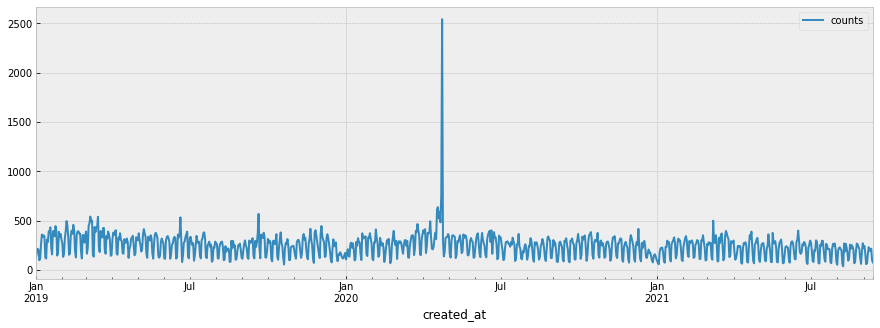

In [10]:
# Plot tweets/day
fig, ax = plt.subplots(figsize=(15,5))
(ddf
 .plot(ax=ax)
)

<AxesSubplot:xlabel='created_at'>

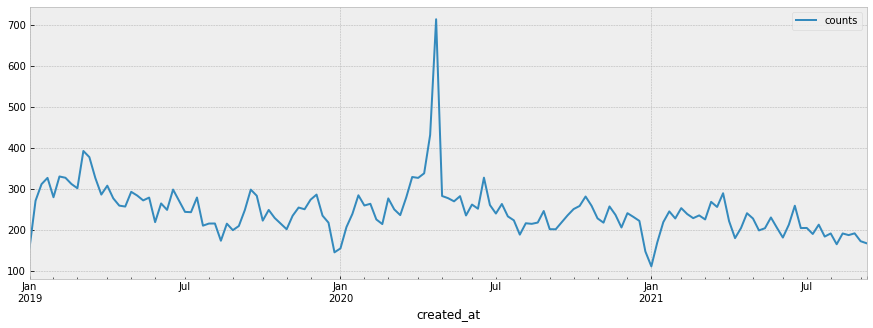

In [11]:
# Plot tweets/week
fig, ax = plt.subplots(figsize=(15,5))
(ddf
 .resample('w')
 .mean()
 .plot(ax=ax)
)

##### Gesamtkommunikationsvolumen

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

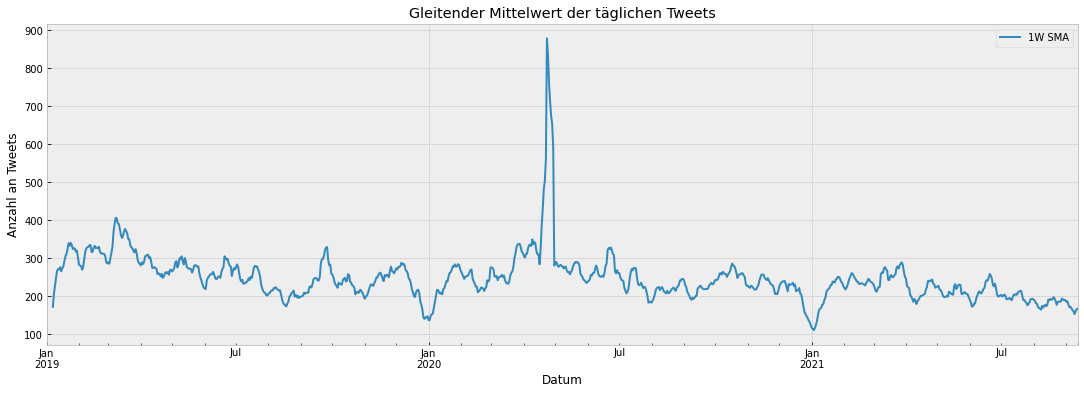

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))
fig.tight_layout()
(ddf 
 .rolling(7) # rolling(7) instead of resample(w) to keep weekend dips visible
 .mean()
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Simple Moving Average of Number of Tweets')

##### Peak 5 - Zoom in on timeframe

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

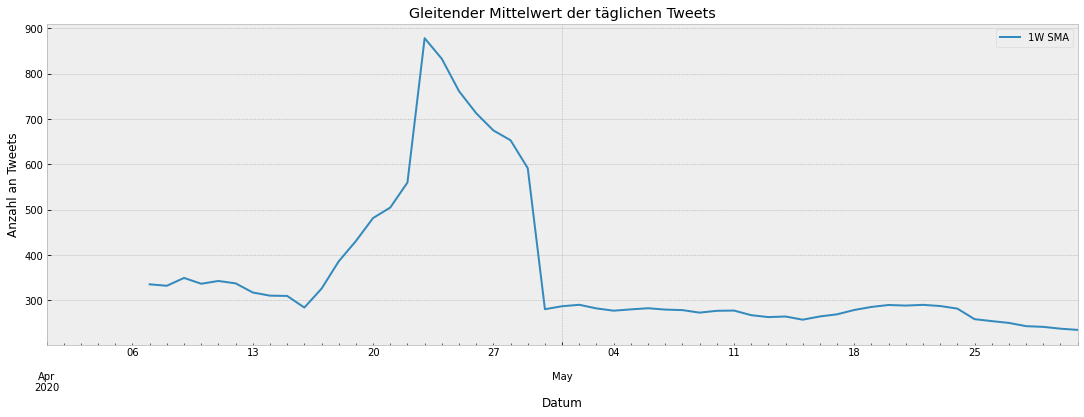

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2020-04-01') &
      (ddf.index < '2020-06-01')]
 .rolling(7)
 .mean()
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

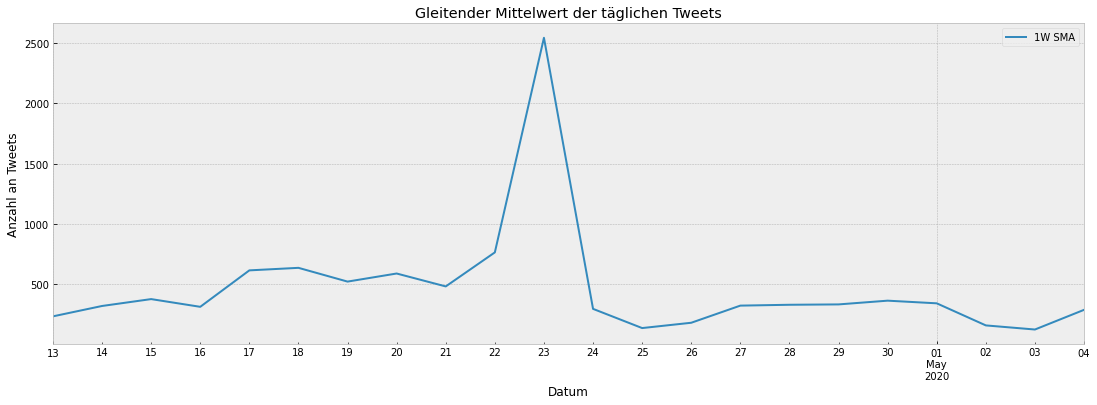

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2020-04-13') &
      (ddf.index < '2020-05-05')]
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

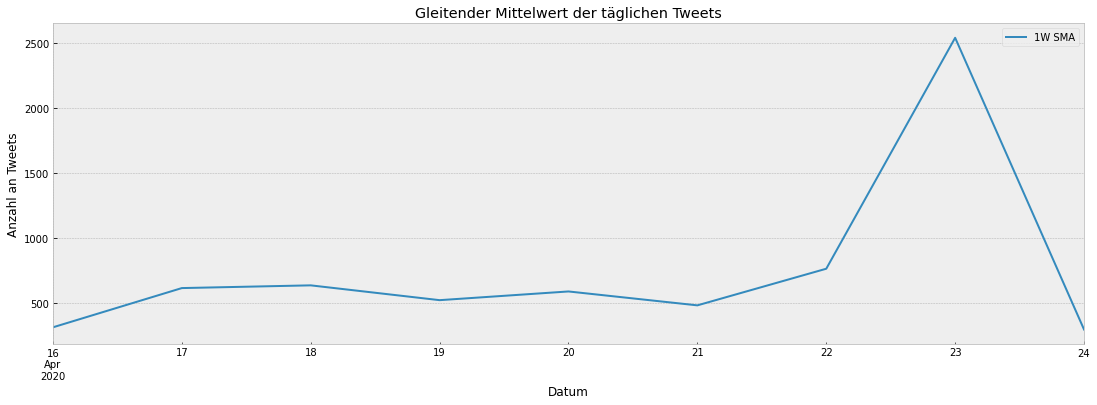

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2020-04-16') &
      (ddf.index < '2020-04-25')]
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

In [16]:
ndf = tdf[(tdf['created_at'] >= '2020-04-16') & (tdf['created_at'] < '2020-04-24')]
ndf

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
1250,87371572,To help combat the #COVID19Crisis and its effe...,2020-04-23 18:03:44+00:00,"[{'start': 80, 'end': 91, 'username': 'Matthew...",NaN,"[{'start': 19, 'end': 33, 'tag': 'COVID19Crisi...","[help, combat, #covid19crisis, effects, vulner...",False,NaN,309,1,2020-04-23,ACNA,9023,NaN
1619,903497472,Reflecting on Earth Day in the midst of the CO...,2020-04-22 11:35:29+00:00,NaN,"[{'start': 14, 'end': 22, 'probability': 0.818...","[{'start': 88, 'end': 101, 'tag': 'EarthDay202...","[reflecting, earth, day, midst, covid, pandemi...",False,NaN,101,1,2020-04-22,Anglican Alliance,2291,United Kingdom
1620,903497472,Happy Earth Day!\n\nPlease watch this inspirin...,2020-04-22 09:48:48+00:00,NaN,"[{'start': 6, 'end': 14, 'probability': 0.6642...","[{'start': 181, 'end': 194, 'tag': 'EarthDay20...","[happy, earth, day, please, watch, inspiring, ...",False,NaN,194,1,2020-04-22,Anglican Alliance,2291,United Kingdom
1621,903497472,To help Christians reflect on their faith and ...,2020-04-21 08:28:03+00:00,NaN,"[{'start': 100, 'end': 116, 'probability': 0.6...",NaN,"[help, christians, reflect, faith, scriptures,...",False,NaN,270,1,2020-04-21,Anglican Alliance,2291,United Kingdom
1902,761714520,RT @StBartholomews: Happy St George's Day! Wha...,2020-04-23 19:44:44+00:00,"[{'start': 3, 'end': 18, 'username': 'StBartho...","[{'start': 26, 'end': 34, 'probability': 0.862...",NaN,"[happy, george's, day, could, better, choral, ...",False,retweeted,169,1,2020-04-23,Anglican Centre Rome,2681,Italia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242265,2193947323,RT @RFayayo: Yesterday I had the privilege to ...,2020-04-19 18:25:31+00:00,"[{'start': 3, 'end': 11, 'username': 'RFayayo'...",NaN,NaN,"[yesterday, privilege, listen, life, changing,...",False,retweeted,290,1,2020-04-19,Zimbabwe Council of Churches,5834,Zimbabwe
242266,2193947323,"My week on Twitter 🎉: 27 Mentions, 15.5K Menti...",2020-04-19 18:01:03+00:00,NaN,"[{'start': 11, 'end': 17, 'probability': 0.773...",NaN,"[week, twitter, mentions, <-url->, mention, re...",False,NaN,162,1,2020-04-19,Zimbabwe Council of Churches,5834,Zimbabwe
242267,2193947323,"Our biggest fans this week: molokele, ImChrisC...",2020-04-19 07:00:45+00:00,NaN,NaN,NaN,"[biggest, fans, week, molokele, imchrischaramb...",False,NaN,132,1,2020-04-19,Zimbabwe Council of Churches,5834,Zimbabwe
242268,2193947323,To all breastfeeding Mothers\n\n@WCOZIMBABWE \...,2020-04-16 12:32:33+00:00,"[{'start': 30, 'end': 42, 'username': 'WCOZIMB...",NaN,"[{'start': 44, 'end': 57, 'tag': 'FightCovid19'}]","[breastfeeding, mothers, #fightcovid19, <-url->]",False,NaN,81,1,2020-04-16,Zimbabwe Council of Churches,5834,Zimbabwe


##### Peak 5 - Check for most frequently used words

In [17]:
top_dates(tweet_counter(ndf))

array(['2020-04-23T00:00:00.000000000', '2020-04-17T00:00:00.000000000',
       '2020-04-22T00:00:00.000000000', '2020-04-21T00:00:00.000000000',
       '2020-04-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
get_frequent_terms(ndf['text']).head(15)

,count
token,
register,4117
water,4108
clean,4101
clean water,4093
#6kforwater,4089
code,4088
discount,4087
discount code,4087
register #6kforwater,4086


In [20]:
(ndf
 .groupby('author_id')
 .agg({'tweet_count': 'count', 'name': 'last','country': 'last'})
 .sort_values('tweet_count',ascending = False)
 .reset_index(drop=True)
 .rename(columns={'tweet_count': 'Tweets', 'name': 'Nutzername', 'country': 'Land'})
)

,Tweets,Nutzername,Land
0,4109,World Vision USA,United States
1,165,Micah Institute,United States
2,138,Interfaith Matters,None
3,92,Bread for the World,United States
4,77,The Church of Pentecost,Ghana
...,...,...,...
104,1,EILER,Philippines
105,1,Conf of European Churches,België / Belgique / Belgien
106,1,ACNA,None
107,1,Ecumenical Water Network (WCC-EWN),None


##### Peak 5 - Identify tweet text

In [21]:
(ndf[ndf['text'].str.contains('Thank you for the ❤️\nWe’ll reply with your discount code on 4/23 to register for the #6kforwater. Together we’re making a difference for kids without clean water!')])

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
232164,11859822,@starball772 Thank you for the ❤️\nWe’ll reply...,2020-04-23 15:12:23+00:00,"[{'start': 0, 'end': 12, 'username': 'starball...",NaN,"[{'start': 98, 'end': 109, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,175,1,2020-04-23,World Vision USA,554386,United States
232165,11859822,@bev_bowns Thank you for the ❤️\nWe’ll reply w...,2020-04-23 15:09:15+00:00,"[{'start': 0, 'end': 10, 'username': 'bev_bown...",NaN,"[{'start': 96, 'end': 107, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,173,1,2020-04-23,World Vision USA,554386,United States
232166,11859822,@Tizlo_ Thank you for the ❤️\nWe’ll reply with...,2020-04-23 14:54:44+00:00,NaN,NaN,"[{'start': 93, 'end': 104, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,170,1,2020-04-23,World Vision USA,554386,United States
232167,11859822,@KarinaAbac3 Thank you for the ❤️\nWe’ll reply...,2020-04-23 14:35:02+00:00,"[{'start': 0, 'end': 12, 'username': 'KarinaAb...",NaN,"[{'start': 98, 'end': 109, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,175,1,2020-04-23,World Vision USA,554386,United States
232168,11859822,@reniyaalaya Thank you for the ❤️\nWe’ll reply...,2020-04-23 13:47:38+00:00,"[{'start': 0, 'end': 12, 'username': 'reniyaal...",NaN,"[{'start': 98, 'end': 109, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,175,1,2020-04-23,World Vision USA,554386,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234225,11859822,@cworkman310 Thank you for the ❤️\nWe’ll reply...,2020-04-17 16:15:45+00:00,"[{'start': 0, 'end': 12, 'username': 'cworkman...",NaN,"[{'start': 98, 'end': 109, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,175,1,2020-04-17,World Vision USA,554386,United States
234226,11859822,@charabroad Thank you for the ❤️\nWe’ll reply ...,2020-04-17 16:08:15+00:00,"[{'start': 0, 'end': 11, 'username': 'charabro...",NaN,"[{'start': 97, 'end': 108, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,174,1,2020-04-17,World Vision USA,554386,United States
234228,11859822,@KylieAbegg Thank you for the ❤️\nWe’ll reply ...,2020-04-17 16:03:05+00:00,"[{'start': 0, 'end': 11, 'username': 'KylieAbe...",NaN,"[{'start': 97, 'end': 108, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,174,1,2020-04-17,World Vision USA,554386,United States
234229,11859822,@VICTORCHOTO Thank you for the ❤️\nWe’ll reply...,2020-04-17 16:02:02+00:00,"[{'start': 0, 'end': 12, 'username': 'VICTORCH...",NaN,"[{'start': 98, 'end': 109, 'tag': '6kforwater'}]","[thank, reply, discount, code, register, #6kfo...",True,NaN,175,1,2020-04-17,World Vision USA,554386,United States


In [23]:
tweets_answer = (ndf[ndf['text']
                       .str
                       .contains('Thank you for the ❤️\nWe’ll reply with your discount code on 4/23 to register for the #6kforwater. Together we’re making a difference for kids without clean water!')
                      ]
                  )

rest_df = ndf.drop(tweets_answer.index, axis=0)


get_frequent_terms(rest_df['text'])

,count
token,
<-url->,2832
one,2166
every,2080
register,2067
water,2058
...,...
fears viral fears,1
feast #resurrection,1
feast #resurrection <-url->,1


In [25]:
rest_df[(rest_df['text']
         .str
         .contains('\nHere’s your \$10 discount code "6KRUN" to register for the #6kforwater! \nEvery registration = clean water for one person! 💧'))]

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
230128,11859822,"@Tizlo_ \nHere’s your $10 discount code ""6KRUN...",2020-04-23 16:17:10+00:00,NaN,NaN,"[{'start': 67, 'end': 78, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,131,1,2020-04-23,World Vision USA,554386,United States
230129,11859822,"@KarinaAbac3 \nHere’s your $10 discount code ""...",2020-04-23 16:17:08+00:00,"[{'start': 0, 'end': 12, 'username': 'KarinaAb...",NaN,"[{'start': 72, 'end': 83, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,136,1,2020-04-23,World Vision USA,554386,United States
230130,11859822,@Matthew55733845 \nHere’s your $10 discount co...,2020-04-23 16:17:08+00:00,"[{'start': 0, 'end': 16, 'username': 'Matthew5...",NaN,"[{'start': 76, 'end': 87, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,140,1,2020-04-23,World Vision USA,554386,United States
230131,11859822,"@starball772 \nHere’s your $10 discount code ""...",2020-04-23 16:17:07+00:00,"[{'start': 0, 'end': 12, 'username': 'starball...",NaN,"[{'start': 72, 'end': 83, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,136,1,2020-04-23,World Vision USA,554386,United States
230132,11859822,@tjhastings53 \nHere’s your $10 discount code ...,2020-04-23 16:17:06+00:00,"[{'start': 0, 'end': 13, 'username': 'tjhastin...",NaN,"[{'start': 73, 'end': 84, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,137,1,2020-04-23,World Vision USA,554386,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232159,11859822,"@KylieAbegg \nHere’s your $10 discount code ""6...",2020-04-23 16:00:04+00:00,"[{'start': 0, 'end': 11, 'username': 'KylieAbe...",NaN,"[{'start': 71, 'end': 82, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,135,1,2020-04-23,World Vision USA,554386,United States
232160,11859822,"@Carmar0422 \nHere’s your $10 discount code ""6...",2020-04-23 16:00:04+00:00,NaN,NaN,"[{'start': 71, 'end': 82, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,135,1,2020-04-23,World Vision USA,554386,United States
232161,11859822,"@jlubas1125 \nHere’s your $10 discount code ""6...",2020-04-23 16:00:02+00:00,"[{'start': 0, 'end': 11, 'username': 'jlubas11...",NaN,"[{'start': 71, 'end': 82, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,135,1,2020-04-23,World Vision USA,554386,United States
232162,11859822,"@VICTORCHOTO \nHere’s your $10 discount code ""...",2020-04-23 16:00:02+00:00,"[{'start': 0, 'end': 12, 'username': 'VICTORCH...",NaN,"[{'start': 72, 'end': 83, 'tag': '6kforwater'}]","[discount, code, 6krun, register, #6kforwater,...",True,NaN,136,1,2020-04-23,World Vision USA,554386,United States


In [26]:
tweets_call = (rest_df[(rest_df['text']
                         .str
                         .contains('\nHere’s your \$10 discount code "6KRUN" to register for the #6kforwater! \nEvery registration = clean water for one person! 💧'))
                     ]
             )

rest2_df = rest_df.drop(tweets_call.index, axis=0)
get_frequent_terms(rest2_df['text'])

,count
token,
<-url->,2832
<-url-> <-url->,378
#covid19,372
people,226
covid,199
...,...
fears standing,1
fears standing targeting,1
fears viral,1


##### Last Check

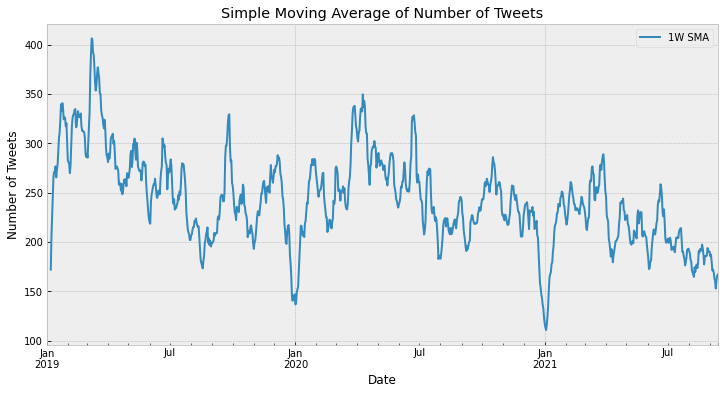

In [30]:
tweet_call = '\nHere’s your \$10 discount code "6KRUN" to register for the #6kforwater! \nEvery registration = clean water for one person! 💧'
tweet_answer = 'Thank you for the ❤️\nWe’ll reply with your discount code on 4/23 to register for the #6kforwater. Together we’re making a difference for kids without clean water!'

def drop_check(df, tweet):
    return df[df['text'].str.contains(tweet)]

def drop_peak(df, tweet):
    drop_df = df[df['text'].str.contains(tweet)]
    return df.drop(drop_df.index, axis=0)

def drop_plot(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
    fig.tight_layout()
    (df
     .rolling(7)
     .mean()
     .rename(columns={"counts": "1W SMA"})
     .plot(ax=axes)
    )

    axes.set_xlabel('Date')
    axes.set_ylabel('Number of Tweets')
    axes.set_title('Simple Moving Average of Number of Tweets')
    
    
final_df = drop_peak(tdf, tweet_call)
drop_plot(tweet_counter(final_df))

## Save result

In [28]:
def drop_peak(df, tweet):
    drop_df = df[df['text'].str.contains(tweet)]
    return df.drop(drop_df.index, axis=0)

final_df = drop_peak(drop_peak(df, tweet_call), tweet_answer)
final_df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


In [29]:
final_df.to_pickle('Your/Data/Path/tweet_dataframe_p5.pkl')